![](EjemploKMeansClustering.png)

- Puntos: Centroides. K means ha encontrado las mejores ubicaciones para acomodar los puntos.
- Le ha asignado a cada punto del dataset (cada pinguino) uno de los centroides. 
- A cada grupo de pinguinos les llamaremos **cluster**.

Pasos:

1. Inicialización: Se eligen la cantidad de k de puntos aleatorios que serán los centroides iniciales.
2. Asignación: Cada puntos de datos (cada pinguino) es asignado al centroide más cercano.
3. Actualiza: Se van recalculando el promedio de todos los puntos asignados al grupo y se reubica el centroide.
4. Iteración: Se van repitiendo los pasos 2 y 3 hasta que la pocisión de los centroides ya no cambie significativamente.

- EL resultado: Los datos se dividen en grupos donde cada punto pertenece al grupo con el centroide más cercano.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
np.random.seed(42) # semilla para la aleatoriedad

In [3]:
data = np.random.rand(100, 2) # genera datos aleatorios
data

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

## 1. Entrenar un modelo de K Means

In [4]:
kmeans = KMeans(
    n_clusters=5, # Cantidad de clusters,
    random_state=42
) 

In [5]:
kmeans.fit(data) # Entrenamiento del modelo

KMeans(n_clusters=5, random_state=42)

In [6]:
centroides = kmeans.cluster_centers_
centroides

array([[0.77630221, 0.71893453],
       [0.30496924, 0.21311702],
       [0.12006068, 0.90489563],
       [0.7920458 , 0.22728231],
       [0.22739621, 0.59428412]])

In [7]:
etiquetas = kmeans.labels_
etiquetas

array([2, 0, 1, 2, 0, 2, 3, 1, 4, 1, 3, 1, 4, 4, 3, 3, 2, 0, 1, 3, 4, 2,
       4, 4, 1, 0, 0, 0, 1, 1, 1, 3, 4, 2, 2, 3, 2, 0, 3, 1, 0, 1, 1, 0,
       3, 4, 0, 0, 1, 1, 4, 4, 3, 4, 1, 1, 0, 0, 3, 0, 0, 1, 4, 0, 4, 1,
       1, 3, 0, 2, 3, 1, 1, 0, 1, 3, 4, 3, 0, 4, 4, 0, 2, 1, 4, 3, 1, 3,
       3, 3, 1, 0, 4, 0, 1, 2, 0, 1, 0, 0], dtype=int32)

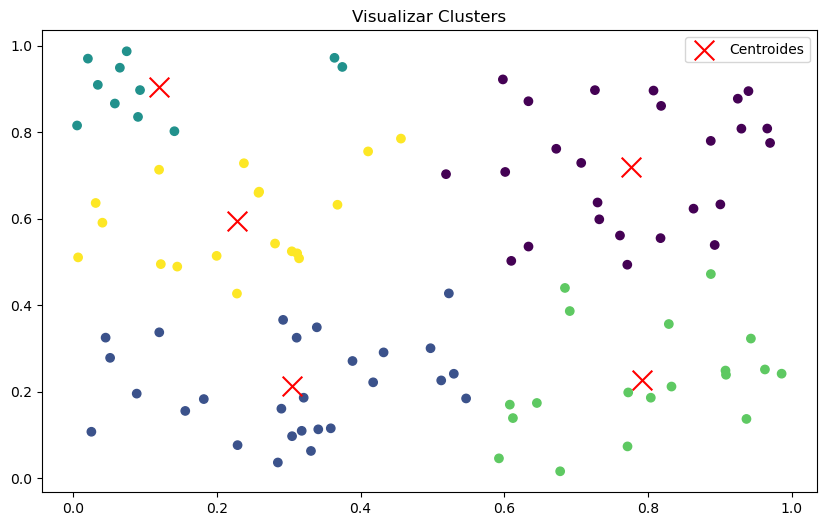

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(
    data[:, 0],
    data[:, 1],
    c=etiquetas,
    cmap="viridis",
    marker="o"
)
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    c="red",
    marker="x",
    s=200,
    label="Centroides"
)

plt.title("Visualizar Clusters")
plt.legend()
plt.show()

- Análisis del cuaderno

    - Se generan 100 puntos aleatorios en un espacio bidimensional (data = np.random.rand(100, 2)).
    - Se entrena el modelo con KMeans(n_clusters=5) para formar 5 grupos o clusters.
    - Se obtienen:
        - Las etiquetas de cada punto indicando a qué grupo pertenece.
        - Las coordenadas de los centroides finales de cada grupo.
    - Se visualizan los puntos coloreados por grupo y los centroides marcados con una 'X' roja grande.

- **Agrupamiento exitoso**: El modelo identificó 5 agrupaciones naturales en los datos, separando correctamente los puntos que están más cerca unos de otros.

- **Centroides representativos**: Cada 'X' roja en el gráfico representa el centro de un grupo, calculado como el promedio de sus puntos. Están ubicados correctamente en zonas centrales de cada cluster.

- **Distribución aleatoria, agrupación coherente**: Aunque los datos eran aleatorios, el modelo logró separar zonas densas de puntos cercanos entre sí.

- **Colores diferentes por cluster**: Los colores muestran visualmente a qué grupo fue asignado cada punto. Esto es útil para interpretar patrones y similitudes.

- **Parámetro k adecuado**: Elegir k=5 resultó coherente para este dataset artificial. Si se usaran más o menos clusters, la separación no sería tan clara.

In [9]:
pinguinos = sns.load_dataset("penguins")
pinguinos.dropna(inplace=True)
pinguinos.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [10]:
data = pinguinos[["bill_length_mm", "bill_depth_mm"]]

In [11]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42
)

In [12]:
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [13]:
centroides = kmeans.cluster_centers_
centroides

array([[38.42426471, 18.27794118],
       [50.90352941, 17.33647059],
       [45.50982143, 15.68303571]])

In [14]:
etiquetas = kmeans.labels_
etiquetas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2,

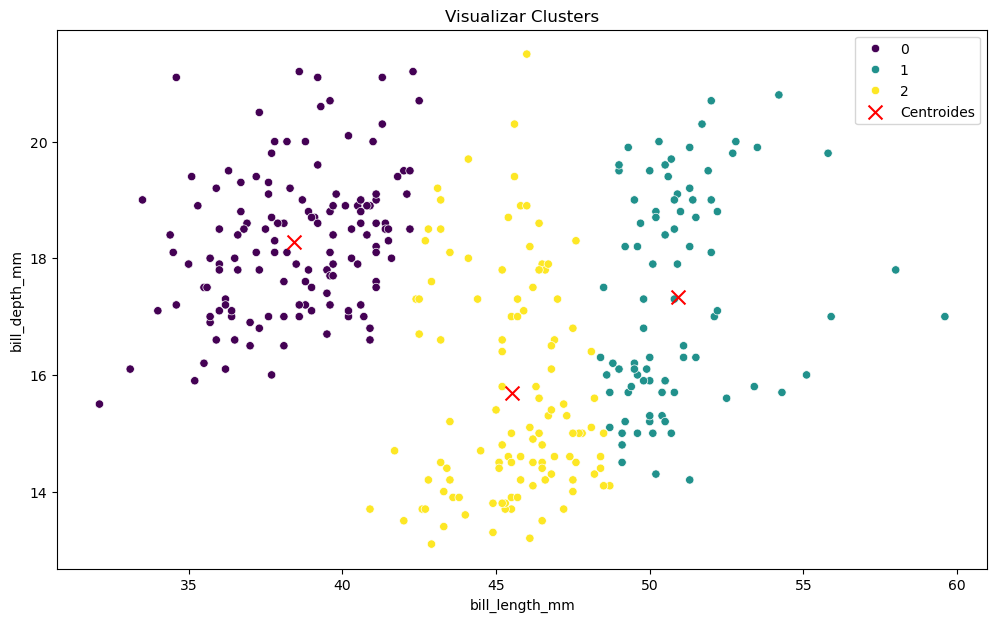

In [15]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=pinguinos,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue=etiquetas,
    palette="viridis",
)
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    c="red",
    marker="x",
    s=100,
    label="Centroides"
)

plt.title("Visualizar Clusters")
plt.legend()
plt.show()

### Ejercicios

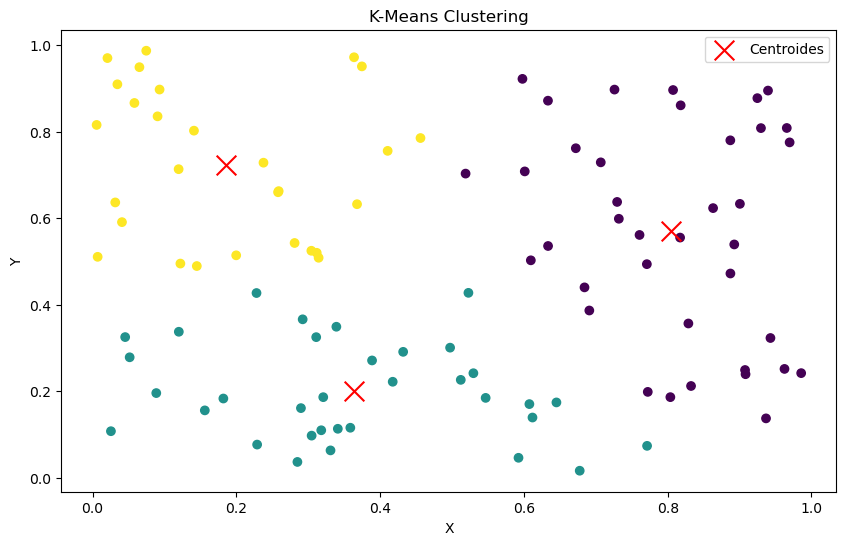

In [16]:
"""
Usando el conjunto de datos que generaste en el ejercicio 1:
    Genera un conjunto de datos bidimensionales aleatorios usando NumPy. 
    Almacenalo en una variable llamada datos
    El conjunto debe contener 100 puntos con valores x e y entre 0 y 1. 
    Utiliza una semilla aleatoria de 42 para garantizar la reproducibilidad.

Luego aplica el algoritmo de K-Means con k=3 clusters.
Visualiza el resultado utilizando Matplotlib para dibujar los puntos de datos y los centroides de cada cluster. Sigue los pasos siguientes:
    Establece el random_state em 42.
    Extrae las etiquetas de cluster y los centroides.
    Esteblece el tamaño del gráfico en (10, 6).
    Muestra un gráfico  scatter donde el eje x muestre la columna 1 de los datos, y el eje y muestre la columna 2 de los datos:
        los puntos del gráfico deben estar coloreados según la etiquetas
        especifica el mapa de colores como: 'viridis'
        los puntos deben tener la forma siguiente: 'o'.
    En el gráfico  scatter los centroides deben mostrar todas las filas de la columna 1 de los datos, y todas las filas de la columna 2 de los datos.
        los puntos que marquen los centrodides deben ser color rojo
        en forma de 'x', tamaño = 200
        Etiqueta = 'Centroides'.
    El título será el siguiente: 'K-Means Clustering'
    Etiqueta x = 'X'
    Etiqueta y = 'Y'
    Muestra la leyenda del gráfico.
Recuerda importar los módulos de python necesarios para que tu código funcione correctamente.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)
datos = np.random.rand(100, 2)   

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(datos)

centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

plt.figure(figsize=(10,6))
plt.scatter(
    datos[:, 0],
    datos[:, 1],
    c=etiquetas,
    cmap="viridis",
    marker="o"
)
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    c="red",
    marker="x",
    s=200,
    label="Centroides"
)
plt.title("K-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
